In [1]:
import pandas as pd

In [2]:
import numpy as np

In [7]:
df =pd.read_csv('911.csv')
df.
df.plot()

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### What are the top 5 zipcodes fr 911 calls

In [11]:
df['zip'].value_counts().head(5)

19401.0    14234
19464.0    13859
19403.0    10372
19446.0     9910
19406.0     6777
Name: zip, dtype: int64

In [15]:
df['twp'].value_counts().head(5)

LOWER MERION    17646
ABINGTON        12570
NORRISTOWN      11892
UPPER MERION    10699
CHELTENHAM       9461
Name: twp, dtype: int64

In [20]:
x = df['title'].iloc[0]

In [21]:
x.split(':')[0]

'EMS'

In [22]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [35]:
df['Reason'].value_counts()

EMS        102623
Traffic     72404
Fire        30553
Name: Reason, dtype: int64

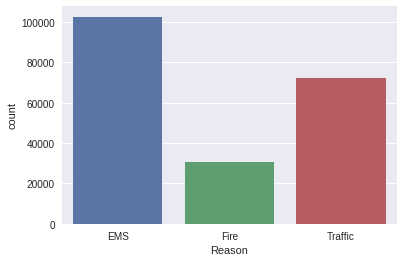

In [36]:
sns.countplot(x="Reason",data=df)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205580 entries, 0 to 205579
Data columns (total 10 columns):
lat          205580 non-null float64
lng          205580 non-null float64
desc         205580 non-null object
zip          180597 non-null float64
title        205580 non-null object
timeStamp    205580 non-null object
twp          205506 non-null object
addr         205580 non-null object
e            205580 non-null int64
Reason       205580 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 15.7+ MB


In [40]:
type(df['timeStamp'].iloc[0])

str

In [41]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [42]:
type(df['timeStamp'].iloc[0])

pandas.tslib.Timestamp

In [43]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [44]:
df['Hour'].head(2)

0    17
1    17
Name: Hour, dtype: int64

In [45]:
df['Month'].head(2)

0    12
1    12
Name: Month, dtype: int64

In [46]:
df['Day of Week'].head(2)

0    3
1    3
Name: Day of Week, dtype: int64

In [47]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [48]:
dmap

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [49]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [52]:
df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


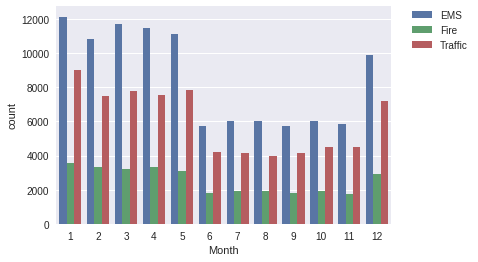

In [71]:
sns.countplot(x='Month',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [72]:
bymonth = df.groupby('Month').count()

In [73]:
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,24701,24701,24701,21877,24701,24701,24692,24701,24701,24701,24701,24701
2,21663,21663,21663,19161,21663,21663,21658,21663,21663,21663,21663,21663
3,22743,22743,22743,20160,22743,22743,22732,22743,22743,22743,22743,22743
4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343,22343
5,22066,22066,22066,19358,22066,22066,22056,22066,22066,22066,22066,22066
6,11732,11732,11732,10205,11732,11732,11726,11732,11732,11732,11732,11732
7,12088,12088,12088,10626,12088,12088,12086,12088,12088,12088,12088,12088
8,11904,11904,11904,10381,11904,11904,11902,11904,11904,11904,11904,11904
9,11669,11669,11669,10174,11669,11669,11666,11669,11669,11669,11669,11669


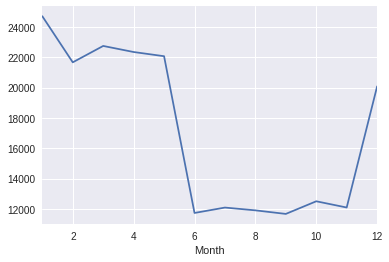

In [75]:
bymonth['lat'].plot()


In [76]:
bymonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,24701,24701,24701,21877,24701,24701,24692,24701,24701,24701,24701,24701
1,2,21663,21663,21663,19161,21663,21663,21658,21663,21663,21663,21663,21663
2,3,22743,22743,22743,20160,22743,22743,22732,22743,22743,22743,22743,22743
3,4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343,22343
4,5,22066,22066,22066,19358,22066,22066,22056,22066,22066,22066,22066,22066
5,6,11732,11732,11732,10205,11732,11732,11726,11732,11732,11732,11732,11732
6,7,12088,12088,12088,10626,12088,12088,12086,12088,12088,12088,12088,12088
7,8,11904,11904,11904,10381,11904,11904,11902,11904,11904,11904,11904,11904
8,9,11669,11669,11669,10174,11669,11669,11666,11669,11669,11669,11669,11669
9,10,12502,12502,12502,10760,12502,12502,12499,12502,12502,12502,12502,12502


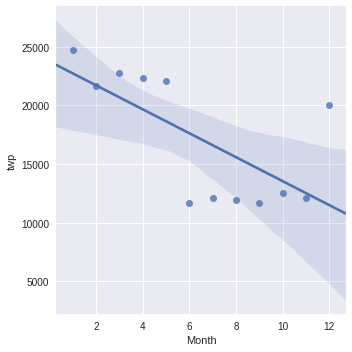

In [79]:
sns.lmplot(x='Month',y='twp',data=bymonth.reset_index())